In [1]:
import pandas as pd

In [2]:
id_df_train = pd.read_csv("data/train_identity.csv") 

In [3]:
id_df_train.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [4]:
id_df_train.id_12.unique()

array(['NotFound', 'Found'], dtype=object)

In [5]:
id_df_train.DeviceInfo.unique()

array(['SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows', ...,
       'LDN-LX3 Build/HUAWEILDN-LX3', 'Z955A', 'LG-E975'], dtype=object)

In [6]:
id_df_train.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [2]:
tr_df_train = pd.read_csv("data/train_transaction.csv") 

In [3]:
tr_df_train.isFraud.value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [4]:
tr_df_train.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [5]:
clients = tr_df_train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain']]

In [6]:
clients.head()

,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain
0,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN
1,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com
2,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com
3,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com
4,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com


In [7]:
clients.shape

(590540, 9)

In [8]:
# удалить дубликаты
duplicates = clients.duplicated(keep='first')
clients = clients[duplicates]
print(f"Количество дубликатов: {clients.shape[0]}")

Количество дубликатов: 495618


In [9]:
clients.isna().sum()

card1                0
card2             5781
card3              337
card4              338
card5             2133
card6              337
addr1            60141
addr2            60141
P_emaildomain    81653
dtype: int64

In [15]:
clients.dtypes

card1              int64
card2            float64
card3            float64
card4             object
card5            float64
card6             object
addr1            float64
addr2            float64
P_emaildomain     object
dtype: object

In [16]:
clients.nunique()

card1            8583
card2             500
card3              82
card4               4
card5              89
card6               4
addr1             160
addr2              47
P_emaildomain      59
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

high_cardinality_cols = ['card1', 'card2', 'card3','card5', 'addr1', 'addr2']
low_cardinality_cols = ['card4', 'card6', 'P_emaildomain']

clients = pd.get_dummies(clients, columns=low_cardinality_cols, drop_first=True)


In [11]:
clients = clients.fillna(-1)

In [12]:
clients.shape

(495618, 70)

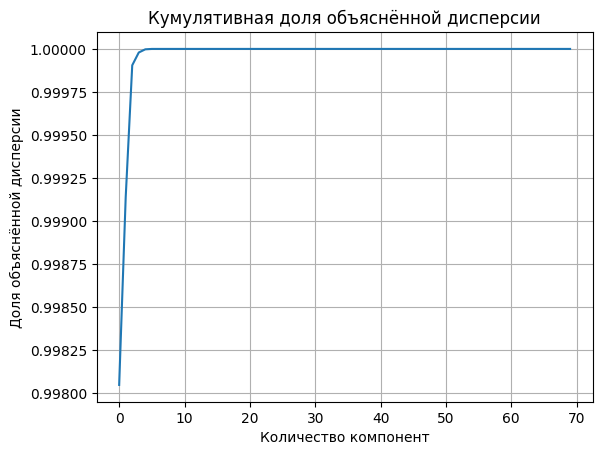

Количество компонент для сохранения 95% дисперсии: 1


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(clients)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel('Количество компонент')
plt.ylabel('Доля объяснённой дисперсии')
plt.title('Кумулятивная доля объяснённой дисперсии')
plt.grid()
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Количество компонент для сохранения 95% дисперсии: {n_components}")


In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=5)
features_pca = pca.fit_transform(clients)




In [14]:
features_pca.shape

(495618, 5)

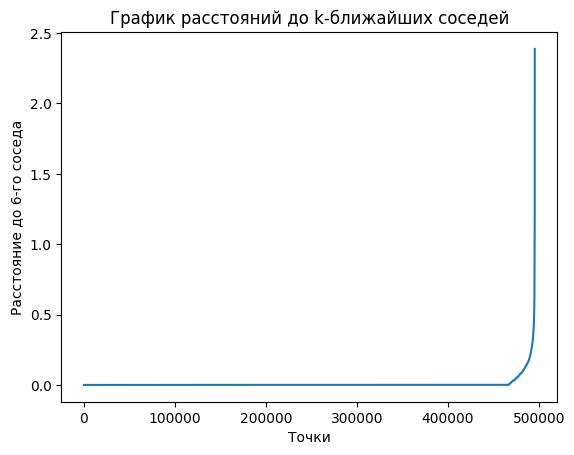

In [15]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Масштабируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_pca)

# Ищем расстояния до ближайших соседей
nearest_neighbors = NearestNeighbors(n_neighbors=6)  # min_samples = 5
nearest_neighbors.fit(features_scaled)
distances, indices = nearest_neighbors.kneighbors(features_scaled)

# Сортируем расстояния и строим график
distances = np.sort(distances[:, -1])  # Берем расстояния до k-го соседа
plt.plot(distances)
plt.xlabel("Точки")
plt.ylabel("Расстояние до 6-го соседа")
plt.title("График расстояний до k-ближайших соседей")
plt.show()


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_pca)

dbscan = DBSCAN(eps=0.1, min_samples=6)  # eps из графика
clusters = dbscan.fit_predict(features_scaled)


In [17]:
len(np.unique(clusters))

5097

In [ ]:
plt.scatter(features_scaled[:, 0], features_scaled[:, 3], c=clusters, cmap='viridis')
plt.title("Результаты кластеризации DBSCAN")
plt.show()

In [ ]:
for i in range(5):  # Первая колонка
    for j in range(i + 1, 5):  # Вторая колонка (не совпадает с первой)
        plt.figure(figsize=(8, 6))
        plt.scatter(features_scaled[:, i], features_scaled[:, j], c=clusters, cmap='viridis', s=10)
        plt.title(f"Результаты кластеризации DBSCAN\nКолонки: {i} и {j}")
        plt.xlabel(f"Колонка {i}")
        plt.ylabel(f"Колонка {j}")
        plt.colorbar(label='Кластеры')
        plt.grid(True)
        plt.show()

In [18]:
np.shape(clusters)

(495618,)

In [19]:
clients2 = tr_df_train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain']]

In [20]:
clients2 = clients2[duplicates]

In [21]:
clients2.shape

(495618, 9)

In [22]:
clients2['cluster'] = clusters

In [23]:
clients2.head()

,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,cluster
51,7835,361.0,150.0,visa,226.0,debit,472.0,87.0,yahoo.com,0
61,12544,321.0,150.0,visa,226.0,debit,441.0,87.0,gmail.com,1
75,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,gmail.com,2
77,3278,453.0,150.0,visa,226.0,debit,122.0,87.0,gmail.com,3
89,17188,321.0,150.0,visa,226.0,debit,299.0,87.0,gmail.com,4


In [24]:
clients2.to_csv("data/clustered_clients.csv")

In [25]:
tr_df_train.shape

(590540, 394)

In [38]:
tr_df_train.nunique()

TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt     20902
ProductCD              5
                   ...  
V335                 672
V336                 356
V337                 254
V338                 380
V339                 334
Length: 394, dtype: int64

In [ ]:
Vesta_columns = [col for col in tr_df_train.columns if col.startswith('V')]
Vesta_df = tr_df_train[Vesta_columns]

In [27]:
Vesta_df.shape

(590540, 339)

In [28]:
Vesta_df.to_csv("data/Vesta_features.csv")

In [29]:
tr_df_train_dropped = tr_df_train.drop(columns=Vesta_df)

In [30]:
tr_df_train_dropped.shape

(590540, 55)

In [34]:
tr_df_train_dropped = tr_df_train_dropped[duplicates]
tr_df_train_dropped['cluster'] = clusters

C:\Users\papul.DESKTOP-U29R0P8.000\AppData\Local\Temp\ipykernel_16704\497743080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df_train_dropped['cluster'] = clusters


In [35]:
tr_df_train_dropped.to_csv("data/dropped_train_transcation_with_clusters.csv")

In [36]:
tr_df_train_dropped.shape

(495618, 56)

In [37]:
tr_df_train_dropped.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M1,M2,M3,M4,M5,M6,M7,M8,M9,cluster
51,2987051,0,87328,226.00,W,7835,361.0,150.0,visa,226.0,...,T,T,T,M0,T,T,NaN,NaN,NaN,0
61,2987061,0,87596,58.95,W,12544,321.0,150.0,visa,226.0,...,T,T,T,NaN,NaN,T,F,F,T,1
75,2987075,0,87779,68.50,W,4806,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,M1,T,T,NaN,NaN,NaN,2
77,2987077,0,87793,280.00,W,3278,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,M1,F,NaN,NaN,NaN,NaN,3
89,2987089,0,88042,318.95,W,17188,321.0,150.0,visa,226.0,...,T,T,T,NaN,NaN,T,F,F,T,4


In [33]:
# Проверяем пересечение по ключевым столбцам
common_keys = tr_df_train_dropped.merge(clients2, on=['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain'], how='inner')
print(f"Количество строк для сопоставления: {len(common_keys)}")


MemoryError: Unable to allocate 12.9 GiB for an array with shape (14, 123663190) and data type object

In [32]:

tr_df_train_merged = pd.merge(tr_df_train_dropped, clients2, on=['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain'], how='left')


MemoryError: Unable to allocate 12.9 GiB for an array with shape (14, 123709848) and data type object

In [ ]:
import pandas as pd
import numpy as np

# Выбираем только числовые признаки из tr_df_train
numerical_features = tr_df_train.select_dtypes(include=[np.number])

# Вычисляем корреляционную матрицу
correlation_matrix = numerical_features.corr()

# Создаем маску для корреляций выше порога (например, 0.9)
threshold = 0.7
high_corr_pairs = np.where(np.abs(correlation_matrix) > threshold)

# Выбираем пары высококоррелированных признаков
high_corr_features = [
    (correlation_matrix.index[x], correlation_matrix.columns[y])
    for x, y in zip(*high_corr_pairs) if x != y and x < y
]

# Сохраняем уникальные имена фич, которые нужно удалить
features_to_drop = set()
for feature_a, feature_b in high_corr_features:
    # Добавляем одно из двух (например, feature_b) в список для удаления
    features_to_drop.add(feature_b)

# Удаляем высококоррелированные признаки из исходной таблицы
tr_df_train_reduced = tr_df_train.drop(columns=features_to_drop)

print(f"Удалено {len(features_to_drop)} признаков: {features_to_drop}")


In [37]:
# Пример
tr_df_train_merged = pd.merge(tr_df_train, clients2, on=['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain'], how='left')


MemoryError: Unable to allocate 347. GiB for an array with shape (376, 123709848) and data type float64

In [31]:
tr_df_test = pd.read_csv("data/test_transaction.csv") 

In [32]:
id_df_test = pd.read_csv("data/test_identity.csv") 

In [ ]:
print(len(tr_df_train))
print(len(tr_df_test))
print(len(id_df_train))
print(len(id_df_test))

590540
506691
144233
141907


In [35]:
print(tr_df_train.shape)
print(tr_df_test.shape)
print(id_df_train.shape)
print(id_df_test.shape)

(590540, 394)
(506691, 393)
(144233, 41)
(141907, 41)
